# Project Title: **Credit Card Fraud Detection using Machine Learning**

**Project Overview:**

This project focuses on detecting fraudulent credit card transactions using machine learning techniques. Given the highly imbalanced nature of the dataset - where fraudulent cases are significantly fewer than legitimate ones - we explore various strategies to improve model performance, including undersampling, oversampling, SMOTE and ensemble methods. The final model aims to accurately identify fraud while minimizing false positives.

**Objective:**

To build an effective and reliable fraud detection system by:

- Handling class imbalance through resampling techniques (undersampling, oversampling, SMOTE).

- Selecting the best approach for maximizing fraud detection accuracy without compromising efficiency.

# **Step 1: Import Required Libraries**

In [ ]:
import numpy as np
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
import warnings

from sklearn.tree import DecisionTreeRegressor
warnings.filterwarnings('ignore')

# **Step 2: Load Dataset**

In [ ]:
# Install kagglehub with pandas support (if not already installed)
!pip install -q kagglehub[pandas-datasets]

import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the correct file path inside the dataset
file_path = "creditcard.csv"

# Load the dataset
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "mlg-ulb/creditcardfraud",
    file_path
)

# Display first 5 rows
print("First 5 records:")
print(df.head())

First 5 records:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26    

# **Step 3: Basic Information About Dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**No categorical features found, so encoding is not required.**

In [ ]:
df.shape

(284807, 31)

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

# **Step 4: Check Missing Values**

In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


**Fix Missing Values**

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


# **Step 5: Dataset Summary**

In [ ]:
print(f"Shape of dataset: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

Shape of dataset: (284807, 31)
Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


# **Step 6: Class Imbalance Analysis**

In [ ]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


**Visualizing Imbalance**

Fraud Cases: 492
Valid Transactions: 284315


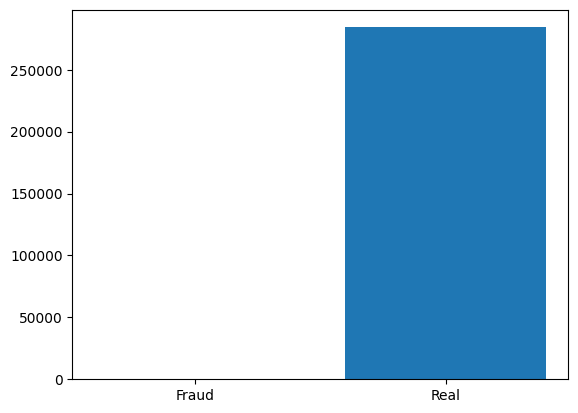

In [ ]:
label_size = [df['Class'].sum(), len(df['Class'])- df['Class'].sum()]
plt.bar(['Fraud','Real'],label_size)
print('Fraud Cases: {}'.format(len(df[df['Class'] == 1])))
print('Valid Transactions: {}'.format(len(df[df['Class'] == 0])))

**The dataset is imbalanced, so it is essential to apply balancing techniques before model training.**

# **Step 7: Split Data**

In [ ]:
X=df.drop('Class',axis=1)
y=df['Class']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [ ]:
print(X_train.shape)
print(y_train.shape)


(227845, 30)
(227845,)


# **Step 8: Build the ANN Model**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [ ]:
# Function to build, compile and train an ANN model
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=30, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)

    print(model.evaluate(X_test, y_test))

    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print("Report: \n", classification_report(y_test, y_preds))

    return y_preds

In [ ]:
# Call the ANN Model
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.9962 - loss: 7.5510
Epoch 2/100
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9969 - loss: 1.8513
Epoch 3/100
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9974 - loss: 0.2973
Epoch 4/100
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9980 - loss: 0.1185
Epoch 5/100
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9972 - loss: 0.1857
Epoch 6/100
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9982 - loss: 0.0175
Epoch 7/100
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9983 - loss: 0.0141
Epoch 8/100
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9981 - loss: 0.0214
Epoch 9/100
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9982 - loss: 0.0148
Epoch 10/100
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9981 - loss: 0.0143
Epoch 11/100
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9984 - loss: 0.0127
Epoch 12

Confusion matrix:
 [[56863     1]
 [   98     0]]


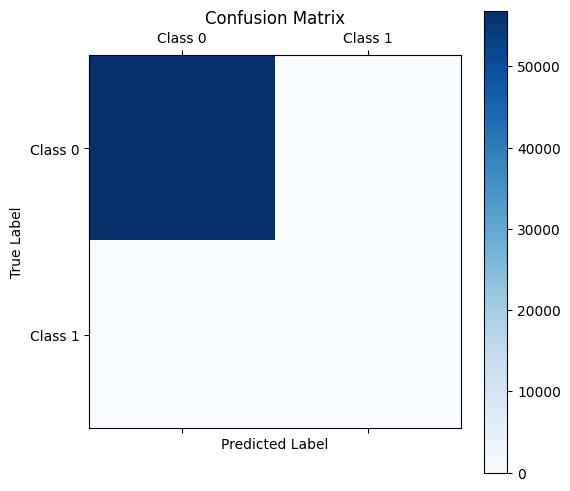

In [ ]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

# Compute the confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_preds)
print('Confusion matrix:\n', conf_mat)

# Define class labels
labels = ['Class 0', 'Class 1']

# Create a plot for the confusion matrix
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Set axis labels and ticks
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

# **Step 9. Under Sampling Method**

In [ ]:
count_class_0, count_class_1 = df.Class.value_counts()
df_class_0 = df[df['Class'] == 0]
df_class_1 = df[df['Class'] == 1]
print("Number of Safe transactions: ",len(df_class_0))
print("Number of fraud transactions: ",len(df_class_1))

Number of Safe transactions:  284315
Number of fraud transactions:  492


In [ ]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Class.value_counts())

Random under-sampling:
Class
0    492
1    492
Name: count, dtype: int64


**Undersampling is not suitable here, as the minority class contains only 492 samples, leading to significant data loss.**

# **Step 10: Over Sampling Method**

In [ ]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Class.value_counts())

Random over-sampling:
Class
0    284315
1    284315
Name: count, dtype: int64


In [ ]:
X = df_test_over.drop('Class',axis='columns')
y = df_test_over['Class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [ ]:
y_train.value_counts()

,count
Class,
0,227452
1,227452


In [ ]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.7377 - loss: 13.8248
Epoch 2/100
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - accuracy: 0.8857 - loss: 5.6609
Epoch 3/100
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - accuracy: 0.9035 - loss: 3.8843
Epoch 4/100
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9103 - loss: 3.2423
Epoch 5/100
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - accuracy: 0.9173 - loss: 2.1315
Epoch 6/100
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.9203 - loss: 1.4291
Epoch 7/100
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.9210 - loss: 0.8669
Epoch 8/100
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - accuracy: 0.9252 - loss: 0.6243
Epoch 9/100
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.9307 - loss: 0.3134
Epoch 10/100
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9396 - loss: 0.1679
Epoch 11/100
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.9375 

# **Step 11: SMOTE Method**

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

X_sm, y_sm = SMOTE(k_neighbors=2,sampling_strategy='minority').fit_resample(X,y)

y_sm.value_counts()

,count
Class,
0,284315
1,284315


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [ ]:
y_train.value_counts()

,count
Class,
0,227452
1,227452


In [ ]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - accuracy: 0.7595 - loss: 25.9041
Epoch 2/100
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.9002 - loss: 0.4679
Epoch 3/100
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9203 - loss: 0.2197
Epoch 4/100
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.9276 - loss: 0.2030
Epoch 5/100
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.9303 - loss: 0.1946
Epoch 6/100
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - accuracy: 0.9335 - loss: 0.1885
Epoch 7/100
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - accuracy: 0.9357 - loss: 0.1798
Epoch 8/100
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.9386 - loss: 0.1713
Epoch 9/100
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.9389 - loss: 0.1687
Epoch 10/100
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.9402 - loss: 0.1661
Epoch 11/100
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - accuracy: 0.9423 

# **Step 12: Ensemble Learning with Undersampling Method**

In [ ]:
df.Class.value_counts()

,count
Class,
0,284315
1,492


In [ ]:
X=df.drop('Class',axis=1)
y=df['Class']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [ ]:
y_train.value_counts()

,count
Class,
0,227451
1,394


# **Conclusion:**

In this case, due to the limited size of the minority class (y), applying ensemble with undersampling becomes inefficient. Dividing the majority class (X) into multiple subsets to match the size of y would require training a large number of models and aggregating their predictions, which is computationally expensive and impractical.

Therefore, **ensemble with undersampling is not preferred** for this dataset.

Instead, we find that to effectively handle the **class imbalance** in the credit card fraud detection task, techniques like **Oversampling** or **SMOTE (Synthetic Minority Over-sampling Technique)** are more suitable. When combined with a robust classifier like an **Artificial Neural Network (ANN)**, these methods significantly improve model performance by addressing data skewness while preserving minority class information.